# Yinan Kang Assignment 2
## CSCI 89

In [46]:
!pwd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/Users/yinankang/Downloads


In [13]:
import os
import numpy as np
import gensim
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Setting up from where the lecture example Jupyter notebook began...

## Problem 1

In [20]:
# Getting '100 dimension' glove in there
glove_file = datapath('glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 100)

In [21]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [26]:
def analogy(x1, x2, y1):
	result = model.most_similar(positive=[y1, x2], negative=[x1])
	return result[0][0]

In [37]:
def display_pca_scatterplot(model, words=None, sample=0):
	if words == None:
		if sample > 0:
			words = np.random.choice(list(model.vocab.keys()), sample)
		else:
			words = [ word for word in model.vocab ]
	word_vectors = np.array([model[w] for w in words])
	twodim = PCA().fit_transform(word_vectors)[:,:2]
	plt.figure(figsize=(6,6))
	plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
	for word, (x,y) in zip(words, twodim):
		plt.text(x+0.05, y+0.05, word)

'moscow'

'vegetables'

'scored'

'europe'

<IPython.core.display.Javascript object>


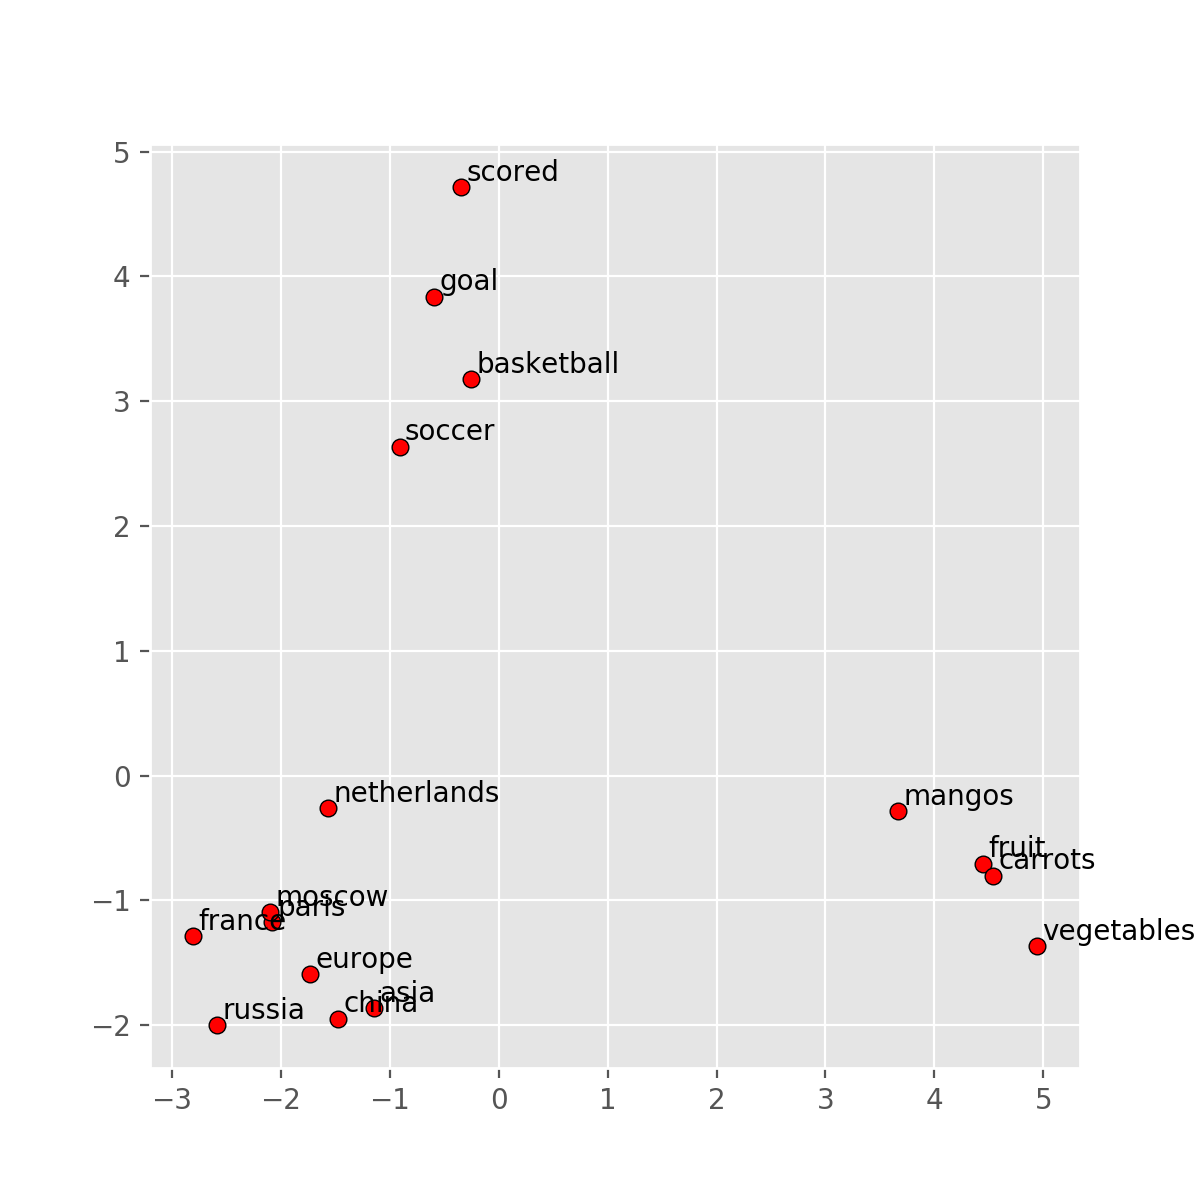

In [55]:
# Chose the following analogies: 
analogy('france','paris','russia')
analogy('mangos','fruit','carrots')
analogy('soccer','goal','basketball')
analogy('china','asia','netherlands')

# Plot
display_pca_scatterplot(model,['france','paris','russia','moscow','mangos','fruit','carrots','vegetables','soccer','goal','basketball'


## Problem 3
### Using 300 dimensional 

In [56]:
glove_file = datapath('glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 300)

In [59]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
def analogy(x1, x2, y1):
	result = model.most_similar(positive=[y1, x2], negative=[x1])
	return result[0][0]
def display_pca_scatterplot(model, words=None, sample=0):
	if words == None:
		if sample > 0:
			words = np.random.choice(list(model.vocab.keys()), sample)
		else:
			words = [ word for word in model.vocab ]
	word_vectors = np.array([model[w] for w in words])
	twodim = PCA().fit_transform(word_vectors)[:,:2]
	plt.figure(figsize=(6,6))
	plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
	for word, (x,y) in zip(words, twodim):
		plt.text(x+0.05, y+0.05, word)

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


'moscow'

'vegetables'

'goals'

'europe'

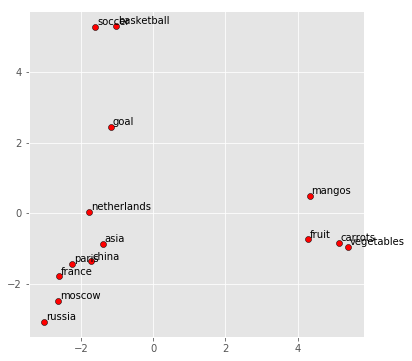

In [110]:
analogy('france','paris','russia')
analogy('mangos','fruit','carrots')
analogy('soccer','goal','basketball')
analogy('china','asia','netherlands')

# Plot
display_pca_scatterplot(model,['france','paris','russia','moscow','mangos','fruit','carrots','vegetables','soccer','goal','basketball'
                              ,'china','asia','netherlands'])


We see that with '300 dimensional', the spatial difference between like terms grows larger. 


## Problem 3
### Using T-SNE

In [111]:
## Problem 4
### Using Scikit-Learn TSNE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
    perplexity = 30, n_components=2, init='pca', n_iter=5000, method = 'exact')
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [reverse_dictionary[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))



NameError: name 'final_embeddings' is not defined

Unsure how to go about this error. Also ran out of time b/c attending work conference :(

## Problem 4

In [81]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

encoding_dim = 64
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta',loss = 'binary_crossentropy')

In [82]:
# Only x data, as no labels are being included
(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float64') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [115]:
print(x_train.shape)
history = autoencoder.fit(x_train, x_train, epochs=3, shuffle = True, batch_size = 256
                         , validation_data=(x_test,x_test))

# Only doing 3 epochs b/c running locally


(60000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 58s 961us/step - loss: 0.0857 - val_loss: 0.0845
Epoch 2/3
60000/60000 [==============================] - 55s 909us/step - loss: 0.0833 - val_loss: 0.0801
Epoch 3/3
60000/60000 [==============================] - 55s 912us/step - loss: 0.0814 - val_loss: 0.0816


dict_keys(['val_loss', 'loss'])

Text(0.5,1,'Training and validation loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

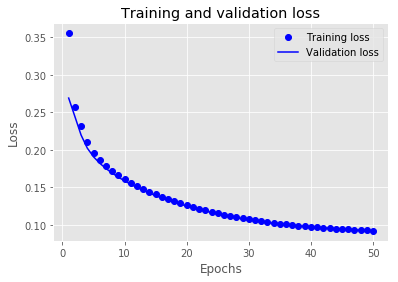

In [93]:
# Plot Loss Function

history_dict = history.history 
history_dict.keys() 



import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Problem 5

<Figure size 1440x144 with 0 Axes>

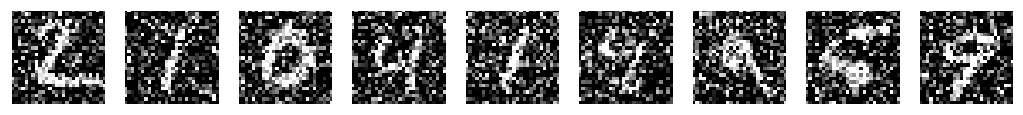

In [105]:
# Getting data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# adapt this if using `channels_first` image data format
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,
scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,
scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Seeing noisy digits
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n,1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [99]:
# Using 32: 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1)) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [107]:
# Model train
autoencoder.fit(x_train_noisy, x_train,
    epochs=3, # Setting epochs low b/c running this locally
    batch_size=128,
    shuffle=True,
    validation_data=([x_test_noisy, x_test]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1110 - val_loss: 0.1062
Epoch 2/3
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1075 - val_loss: 0.1057
Epoch 3/3
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1052 - val_loss: 0.1037


<Figure size 1440x288 with 0 Axes>

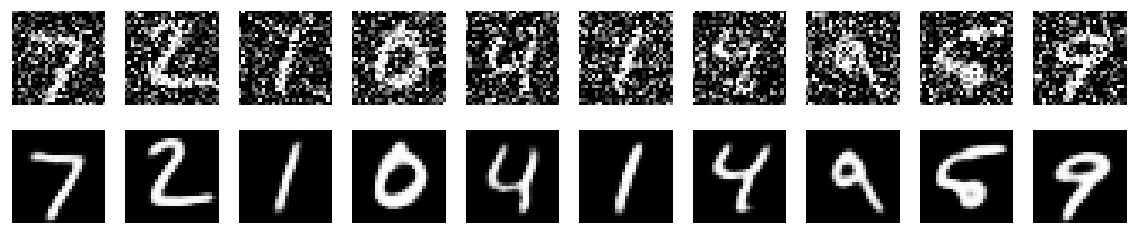

In [108]:
# Seeing Results of '32'
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Building and training '16' model: 


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 56s 940us/step - loss: 0.1887 - val_loss: 0.1307
Epoch 2/3
60000/60000 [==============================] - 56s 940us/step - loss: 0.1270 - val_loss: 0.1197
Epoch 3/3
60000/60000 [==============================] - 56s 935us/step - loss: 0.1186 - val_loss: 0.1173


<Figure size 1440x288 with 0 Axes>

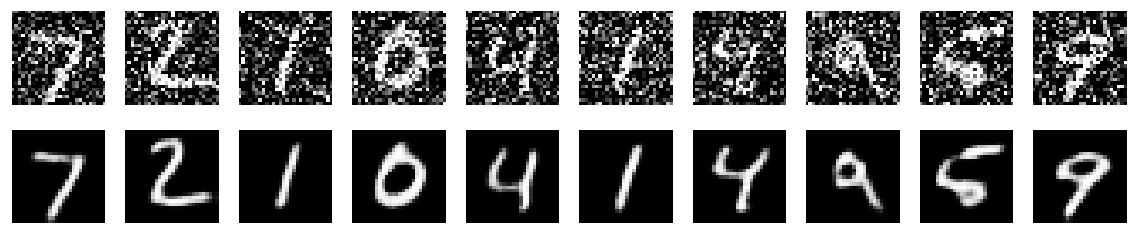

In [109]:
input_img = Input(shape=(28, 28, 1)) 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Model train
autoencoder.fit(x_train_noisy, x_train,
    epochs=3, # Setting epochs low b/c running this locally
    batch_size=128,
    shuffle=True,
    validation_data=([x_test_noisy, x_test]))

# Seeing Results of '16'
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The results are noticeably less clear with '16' channels vs '36'